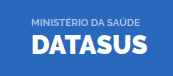

---
**Sugestões de Análise:**
* **Comparar a distribuição geográfica dos leitos por município antes e depois da pandemia**
* **Analisar a evolução do número de leitos no tempo**
* **Verificar se em algum momento pôde ser observado um declínio na capacidade hospitalar instalada**
* **Comparar a quantidade de leitos SUS e leitos não SUS no tempo e no espaço**

---

# 1. Carregando as dependências do projeto

In [218]:
# sistema
from os import system

# manipulação e tratamento de dados tabulares
import pandas as pd
import pysus.online_data.CNES as CNES
import pandasql as ps

# bibliotecas numéricas
import numpy as np

# bibliotecas de visualização e estatítica
from matplotlib import pyplot as plt
import seaborn as sns

---

# 2. Carregando a base de dados

**Tendo o objetivo de realizar uma análise exploratória para descrever a evolução da capacidade hospitalar (número de leitos) durante a pandemia de Covid-19 em Goiás, podemos considerar como período ```dez/2019``` (que foi tido como o primeiro mês do início da pandemia) até ```nov/2022``` (que é o último mês registrado na base de dados original antes da elaboração do presente relatório).**

**Além disso, iremos criar variáveis para representar uma estrutura tabular de dados ("dataframe") seguindo o padrão ```df_mes_ano```, em que:**
* **mes: 2 dígitos numéricos (01-12), representando o mês a ser utilizado para consulta**
* **ano: 2 dígitos numéricos, representando os dois últimos digitos do ano a ser utilizado para consulta**

In [2]:
# Verificando a data atual
system('date')

Thu Dec 29 11:35:52 AM -03 2022


0

**Desta forma, iremos manter o período descrito anteriormente como sendo a filtragem para gerar nossa base de dados. Além disso, vamos criar uma função para facilitar a leitura desses dados.**

In [3]:
def loadDataSUS(year,month,params={
    'group':'LT',
    'state':'GO'
}):
    df = CNES.download(params['group'],params['state'],year,month)
    df = pd.DataFrame(df) # convertendo em objeto Pandas
    if params['group'] == 'LT':
        # criando novos campos
        df['ano'] = [val.strip()[0:4] for val in df['COMPETEN']]
        df['mes'] = [val.strip()[4:] for val in df['COMPETEN']]
    return df

## (i) 2019

In [4]:
df_12_19 = loadDataSUS(2019,12)
df_12_19

2022-12-29 11:36:01.022 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:01.049 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:01.397 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO1912.dbc removed.
2022-12-29 11:36:01.668 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO1912_.parquet


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,ano,mes
0,9331603,520010,,,,,M,3,00000000000000,3,...,2,33,9,0,9,0,201912,1244,2019,12
1,2335506,520013,15,,,,M,3,00269860000125,1,...,2,41,2,0,2,0,201912,2062,2019,12
2,2335506,520013,15,,,,M,3,00269860000125,1,...,1,03,2,0,1,1,201912,2062,2019,12
3,2335506,520013,15,,,,M,3,00269860000125,1,...,4,10,1,0,1,0,201912,2062,2019,12
4,2335506,520013,15,,,,M,3,00269860000125,1,...,6,34,4,0,3,1,201912,2062,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2383691,522205,001,,,,M,3,00000000000000,3,...,4,43,1,0,1,0,201912,1244,2019,12
2806,2383691,522205,001,,,,M,3,00000000000000,3,...,5,45,3,0,3,0,201912,1244,2019,12
2807,2439883,522220,02,,,,M,3,00000000000000,3,...,5,45,4,0,4,0,201912,1244,2019,12
2808,2439883,522220,02,,,,M,3,00000000000000,3,...,2,33,7,0,7,0,201912,1244,2019,12


## (ii) 2020

In [5]:
df_01_20 = loadDataSUS(2020,1)
df_02_20 = loadDataSUS(2020,2)
df_03_20 = loadDataSUS(2020,3)
df_04_20 = loadDataSUS(2020,4)
df_05_20 = loadDataSUS(2020,5)
df_06_20 = loadDataSUS(2020,6)
df_07_20 = loadDataSUS(2020,7)
df_08_20 = loadDataSUS(2020,8)
df_09_20 = loadDataSUS(2020,9)
df_10_20 = loadDataSUS(2020,10)
df_11_20 = loadDataSUS(2020,11)
df_12_20 = loadDataSUS(2020,12)

2022-12-29 11:36:04.338 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:04.367 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:04.699 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2001.dbc removed.
2022-12-29 11:36:04.716 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO2001_.parquet
2022-12-29 11:36:04.917 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:04.945 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:05.327 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2002.dbc removed.
2022-12-29 11:36:05.341 | INFO     | pysus.online_data.CNES:download:83 - D

## (iii) 2021

In [6]:
df_01_21 = loadDataSUS(2021,1)
df_02_21 = loadDataSUS(2021,2)
df_03_21 = loadDataSUS(2021,3)
df_04_21 = loadDataSUS(2021,4)
df_05_21 = loadDataSUS(2021,5)
df_06_21 = loadDataSUS(2021,6)
df_07_21 = loadDataSUS(2021,7)
df_08_21 = loadDataSUS(2021,8)
df_09_21 = loadDataSUS(2021,9)
df_10_21 = loadDataSUS(2021,10)
df_11_21 = loadDataSUS(2021,11)
df_12_21 = loadDataSUS(2021,12)

2022-12-29 11:36:10.357 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:10.385 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:10.680 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2101.dbc removed.
2022-12-29 11:36:10.700 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO2101_.parquet
2022-12-29 11:36:10.815 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:10.844 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:11.149 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2102.dbc removed.
2022-12-29 11:36:11.162 | INFO     | pysus.online_data.CNES:download:83 - D

## (iv) 2022

In [7]:
df_01_22 = loadDataSUS(2022,1)
df_02_22 = loadDataSUS(2022,2)
df_03_22 = loadDataSUS(2022,3)
df_04_22 = loadDataSUS(2022,4)
df_05_22 = loadDataSUS(2022,5)
df_06_22 = loadDataSUS(2022,6)
df_07_22 = loadDataSUS(2022,7)
df_08_22 = loadDataSUS(2022,8)
df_09_22 = loadDataSUS(2022,9)
df_10_22 = loadDataSUS(2022,10)
df_11_22 = loadDataSUS(2022,11)

2022-12-29 11:36:16.378 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:16.406 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:16.751 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2201.dbc removed.
2022-12-29 11:36:16.774 | INFO     | pysus.online_data.CNES:download:83 - Data stored as parquet at /home/noetic-sierra/pysus/CNES_LTGO2201_.parquet
2022-12-29 11:36:16.891 | DEBUG    | pysus.online_data.CNES:download:64 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2022-12-29 11:36:16.922 | DEBUG    | pysus.online_data.CNES:download:69 - Changing FTP work dir to: dissemin/publicos/CNES/200508_/Dados/LT/
2022-12-29 11:36:17.265 | DEBUG    | pysus.online_data.CNES:_fetch_file:99 - LTGO2202.dbc removed.
2022-12-29 11:36:17.283 | INFO     | pysus.online_data.CNES:download:83 - D

## (v) Geral: todos os anos

In [244]:
# Gerando o df principal a partir da concatenação dos anteriores
df_main = pd.concat([
    df_12_19, #2019
    df_01_20,df_02_20,df_03_20,df_04_20,df_05_20,df_06_20,df_07_20,df_08_20,df_09_20,df_10_20,df_11_20,df_12_20, #2020
    df_01_21,df_02_21,df_03_21,df_04_21,df_05_21,df_06_21,df_07_21,df_08_21,df_09_21,df_10_21,df_11_21,df_12_21, #2021
    df_01_22,df_02_22,df_03_22,df_04_22,df_05_22,df_06_20,df_07_22,df_08_22,df_09_22,df_10_22,df_11_22 #2022
])

df_main = df_main[['CODUFMUN','MICR_REG','DISTRADM','TPGESTAO',
                   'PF_PJ','NIV_DEP','ATIVIDAD','CLIENTEL','TP_UNID',
                   'TP_LEITO','QT_EXIST','QT_CONTR','QT_SUS','ano','mes']]

df_main['index'] = [x for x in range(len(df_main))]
df_main

,CODUFMUN,MICR_REG,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_UNID,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS,ano,mes,index
0,520010,,,M,3,3,04,03,15,2,9,0,9,2019,12,0
1,520013,,,M,3,1,04,03,05,2,2,0,2,2019,12,1
2,520013,,,M,3,1,04,03,05,1,2,0,1,2019,12,2
3,520013,,,M,3,1,04,03,05,4,1,0,1,2019,12,3
4,520013,,,M,3,1,04,03,05,6,4,0,3,2019,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,522205,,,M,3,3,04,03,05,1,3,0,3,2022,11,106221
2940,522205,,,M,3,3,04,03,05,4,3,0,3,2022,11,106222
2941,522220,,,M,3,3,04,03,05,2,7,0,7,2022,11,106223
2942,522220,,,M,3,3,04,03,05,4,2,0,2,2022,11,106224


**Fazendo as tratativas individuais nas colunas**

In [245]:
df_main.MICR_REG.value_counts()

          100634
SUL         2632
SUDEST      1401
00           545
04           324
0004         216
SUDOES       186
CENTRO       144
NORTE        144
Name: MICR_REG, dtype: int64

In [246]:
# Verificando registros vazios, podemos defini-los como não listados
new_val = []
for mr in df_main.MICR_REG.values:
    if mr == '' or mr == ' ':
        new_val.append('NÃO LISTADO')
    else:
        new_val.append(mr)
df_main['MICR_REG'] = new_val

In [247]:
df_main.DISTRADM.value_counts()

        105089
00         545
04         324
0004       216
HOSP        52
Name: DISTRADM, dtype: int64

In [248]:
# Verificando registros vazios, podemos defini-los como não listados
new_val = []
for da in df_main.DISTRADM.values:
    if da == '' or da == ' ':
        new_val.append('NÃO LISTADO')
    else:
        new_val.append(da)
df_main['DISTRADM'] = new_val

In [249]:
# Decodificando o tipo de pessoa de acordo com o dicionário dos dados oficial (física ou jurídica)
new_val = []
for pfpj in df_main.PF_PJ.values:
    if pfpj == '1':
        new_val.append('PESSOA FÍSICA')
    else: 
        new_val.append('PESSOA JURÍDICA')
df_main['PF_PJ'] = new_val

In [250]:
# Decodificando nível da dependência acordo com o dicionário dos dados oficial (individual ou mantida)
new_val = []
for dep in df_main.NIV_DEP.values:
    if dep == '1':
        new_val.append('INDIVIDUAL')
    else: 
        new_val.append('MANTIDA')
df_main['NIV_DEP'] = new_val

In [251]:
df_main.head() # confirmando as alterações

,CODUFMUN,MICR_REG,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_UNID,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS,ano,mes,index
0,520010,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,15,2,9,0,9,2019,12,0
1,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,2,2,0,2,2019,12,1
2,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,1,2,0,1,2019,12,2
3,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,4,1,0,1,2019,12,3
4,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,6,4,0,3,2019,12,4


* **Verificando os dtypes e contagem de NaN (nulos)**

In [252]:
# alterando os dtypes
df_main = df_main.astype({
    'CODUFMUN':'string',
    'MICR_REG':'string',
    'DISTRADM':'string',
    'TPGESTAO':'string',
    'PF_PJ':'string',
    'NIV_DEP':'string',
    'ATIVIDAD':'string',
    'CLIENTEL':'string',
    'TP_UNID':'string',
    'TP_LEITO':'string',
    'QT_EXIST':'int32',
    'QT_CONTR':'int32',
    'QT_SUS':'int32',
    'ano':'string',
    'mes':'string'
})

# informação detalhada dos campos com a contagem de nulos
df_main.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106226 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CODUFMUN  106226 non-null  string
 1   MICR_REG  106226 non-null  string
 2   DISTRADM  106226 non-null  string
 3   TPGESTAO  106226 non-null  string
 4   PF_PJ     106226 non-null  string
 5   NIV_DEP   106226 non-null  string
 6   ATIVIDAD  106226 non-null  string
 7   CLIENTEL  106226 non-null  string
 8   TP_UNID   106226 non-null  string
 9   TP_LEITO  106226 non-null  string
 10  QT_EXIST  106226 non-null  int32 
 11  QT_CONTR  106226 non-null  int32 
 12  QT_SUS    106226 non-null  int32 
 13  ano       106226 non-null  string
 14  mes       106226 non-null  string
 15  index     106226 non-null  int64 
dtypes: int32(3), int64(1), string(12)
memory usage: 12.6 MB


---

# 3. Base de dados secundária (listagem de municípios de GO)

* **Disponível em: https://www.ibge.gov.br/explica/codigos-dos-municipios.php**

In [253]:
# carregando os dados e alterando os dtypes
df_municipios=pd.read_csv(
    'RELATORIO_DTB_BRASIL_MUNICIPIO.csv').astype({
    'UF':'string',
    'Nome_UF':'string',
    'Regiao_Geografica_Imediata':'string',
    'Nome_Mesorregiao':'string',
    'Nome_Microrregiao':'string',
    'Nome_Municipio':'string'
})

# Filtragem apenas dos municípios de Goiás e redução das colunas
df_municipios = df_municipios.loc[df_municipios['UF']=='52'][[
    'UF','Nome_UF','Regiao_Geografica_Imediata',
    'Nome_Mesorregiao','Nome_Microrregiao','Nome_Municipio']] 
df_municipios

,UF,Nome_UF,Regiao_Geografica_Imediata,Nome_Mesorregiao,Nome_Microrregiao,Nome_Municipio
5323,52,Goiás,520001,Centro Goiano,Goiânia,Abadia de Goiás
5324,52,Goiás,520002,Leste Goiano,Entorno de Brasília,Abadiânia
5325,52,Goiás,520015,Sul Goiano,Vale do Rio dos Bois,Acreúna
5326,52,Goiás,520003,Centro Goiano,Anicuns,Adelândia
5327,52,Goiás,520022,Leste Goiano,Entorno de Brasília,Água Fria de Goiás
...,...,...,...,...,...,...
5564,52,Goiás,520001,Sul Goiano,Vale do Rio dos Bois,Varjão
5565,52,Goiás,520002,Sul Goiano,Pires do Rio,Vianópolis
5566,52,Goiás,520009,Sul Goiano,Meia Ponte,Vicentinópolis
5567,52,Goiás,520022,Leste Goiano,Entorno de Brasília,Vila Boa


In [254]:
df_municipios.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 5323 to 5568
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   UF                          246 non-null    string
 1   Nome_UF                     246 non-null    string
 2   Regiao_Geografica_Imediata  246 non-null    string
 3   Nome_Mesorregiao            246 non-null    string
 4   Nome_Microrregiao           246 non-null    string
 5   Nome_Municipio              246 non-null    string
dtypes: string(6)
memory usage: 13.5 KB


In [263]:
query = """
        SELECT 
               df_main.*,
               CASE
                   WHEN df_municipios.Nome_Mesorregiao ISNULL THEN 'NÃO LISTADO'
                   ELSE df_municipios.Nome_Mesorregiao
               END AS Nome_Mesorregiao,
               CASE
                   WHEN df_municipios.Nome_Microrregiao ISNULL THEN 'NÃO LISTADO'
                   ELSE df_municipios.Nome_Microrregiao
               END AS Nome_Microrregiao,
               CASE
                   WHEN df_municipios.Nome_Municipio ISNULL THEN 'NÃO LISTADO'
                   ELSE df_municipios.Nome_Municipio
               END AS Nome_Municipio
        FROM df_main 
        LEFT JOIN df_municipios ON df_municipios.Regiao_Geografica_Imediata = df_main.CODUFMUN
        """
df_joined = pd.DataFrame(ps.sqldf(query,locals())).drop_duplicates(["index"])
df_joined

,CODUFMUN,MICR_REG,DISTRADM,TPGESTAO,PF_PJ,NIV_DEP,ATIVIDAD,CLIENTEL,TP_UNID,TP_LEITO,QT_EXIST,QT_CONTR,QT_SUS,ano,mes,index,Nome_Mesorregiao,Nome_Microrregiao,Nome_Municipio
0,520010,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,15,2,9,0,9,2019,12,0,Sul Goiano,Meia Ponte,Porteirão
14,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,2,2,0,2,2019,12,1,Centro Goiano,Anicuns,Aurilândia
23,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,1,2,0,1,2019,12,2,Centro Goiano,Anicuns,Aurilândia
32,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,4,1,0,1,2019,12,3,Centro Goiano,Anicuns,Aurilândia
41,520013,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,INDIVIDUAL,04,03,05,6,4,0,3,2019,12,4,Centro Goiano,Anicuns,Aurilândia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111207,522205,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,1,3,0,3,2022,11,106221,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
111208,522205,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,4,3,0,3,2022,11,106222,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
111209,522220,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,2,7,0,7,2022,11,106223,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
111210,522220,NÃO LISTADO,NÃO LISTADO,M,PESSOA JURÍDICA,MANTIDA,04,03,05,4,2,0,2,2022,11,106224,NÃO LISTADO,NÃO LISTADO,NÃO LISTADO
